In [44]:
import os
import zipfile
import requests

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.mobilenet_v2 import preprocess_input 
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import decode_predictions 

%matplotlib inline

In [45]:
#Checking that Tensorflow detects a GPU
physical_devices = tf.config.list_physical_devices('GPU')
print("GPUs Available:", physical_devices)

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [46]:
#Getting tensorflow version
tf.__version__

'2.18.0'

## Getting images to train our model

In [60]:
dataset_dir = '../dataset/fashion-product-images-small'
zip_file_path = os.path.join(dataset_dir, 'fashion-product-images-small.zip')
download_url = 'https://www.kaggle.com/api/v1/datasets/download/paramaggarwal/fashion-product-images-small'

In [61]:
def is_empty_directory(directory):
    return not os.listdir(directory)

In [62]:
if is_empty_directory(dataset_dir):
    print("Empty dataset directory. Downloading ZIP File from Kaggle...")
    
    response = requests.get(download_url, allow_redirects=True)
    with open(zip_file_path, 'wb') as file:
        file.write(response.content)
    print("Download completed.")

    # Extract the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)
    print("ZIP file extracted.")

    # Delete the ZIP file after extraction
    os.remove(zip_file_path)
else:
    print("The are images already downloaded. No need to download Zip file from Kaggle")

Empty dataset directory. Downloading ZIP File from Kaggle...
Download completed.
ZIP file extracted.


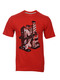

In [50]:
#Load an image
image_path = f'{dataset_dir}/images/'
fullname = f'{image_path}/10009.jpg'
load_img(fullname)

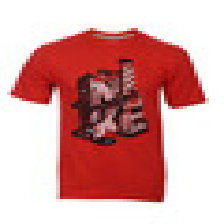

In [51]:
#Resize the image
img=load_img(fullname, target_size=(224,224))
img

In [52]:
x=np.array(img)
x.shape

(224, 224, 3)

In [53]:
model =MobileNetV2(weights='imagenet', input_shape=(224,224,3))

In [54]:
#Preprocess input
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [56]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.93867856)),
  ('n02843684', 'birdhouse', np.float32(0.0048604137)),
  ('n02825657', 'bell_cote', np.float32(0.0017991483)),
  ('n04599235', 'wool', np.float32(0.0016855012)),
  ('n02916936', 'bulletproof_vest', np.float32(0.0010224944))]]